# Pylops - Seismic Interpolation with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-11-15 17:22:06--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-11-15 17:22:06--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 68.2M 1s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    urllib3-1.25.11            |             py_0          93 KB
    pycparser-2.20             |             py_2          94 KB
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    pycosat-0.6.3              |   py36h7b6447c_0         107 KB
    ruamel_yaml-0.15.87        |   py36h7b6447c_1         256 KB
    sqlite-3.33.0              |       h62c20be_0         2.0 MB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    wheel-0.35.1               |     pyhd3eb1b0_0          37 KB
    pip-20.2.4                 |   py36h06a4308_0         2.1 MB
    requests-2.24.0            |             py_0          54 KB
    conda-4.9.2                |   py36h06a4308_0   

urllib3-1.25.11      |   93 KB | ########## | 100% 
pycparser-2.20       |   94 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
ruamel_yaml-0.15.87  |  256 KB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
wheel-0.35.1         |   37 KB | ########## | 100% 
pip-20.2.4           |  2.1 MB | ########## | 100% 
requests-2.24.0      |   54 KB | ########## | 100% 
conda-4.9.2          |  3.1 MB | ########## | 100% 
chardet-3.0.4        |  197 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
openssl-1.1.

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.12 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h79e6602_1         312 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    conda-4.9.2                |   py36h5fab9bb_0         3.0 MB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-8

In [7]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 13 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-jln8c2w_
  Created wheel for pylops: filename=pylops-1.10.1.dev128+gc26c46d-py3-none-any.whl size=166236 sha256=e6228e91243a39af25532b1d46a8a8aef33e95ba37388ef600f6a064c900098e
  Stored in directory: /tmp/pip-ephem-wheel-cache-orq4e4oj/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [8]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [9]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt

from scipy.signal import convolve

from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.basicoperators             import *
from pylops.signalprocessing           import *
from pylops.waveeqprocessing           import *
from pylops.optimization.leastsquares  import *
from pylops.optimization.sparsity  import FISTA

## 2D Synthetic

In [11]:
###### Input parameters
par = {'ox':0,'dx':2,    'nx':140,
       'oy':0,'dy':2,    'ny':101,
       'ot':0,'dt':0.004,'nt':200,
       'f0': 20, 'nfmax': 210}

v       = 1500
t0_m    = [0.2, 0.4, 0.5]
theta_m = [0, 30, -60]
phi_m   = [0]
amp_m   = [1., -2, 0.5]

# Create axis
taxis, taxis2, xaxis, yaxis = makeaxis(par)

# Create wavelet
wav = ricker(taxis[:41], f0=par['f0'])[0]

# Generate model
m, x =  linear2d(xaxis, taxis, v, t0_m, theta_m, amp_m, wav)

# subsampling locations
perc_subsampling=0.4
Nsub=int(np.round(par['nx']*perc_subsampling))

iava = np.sort(np.random.permutation(np.arange(par['nx']))[:Nsub])

# Create restriction operator
Rop = Restriction(par['nx']*par['nt'], iava, dims=(par['nx'], par['nt']), dir=0, dtype='float64')
dottest(Rop,Nsub*par['nt'],par['nx']*par['nt'], verb=True)

y     = Rop*x.flatten()
xadj = Rop.H*y.flatten()
y = y.reshape(Nsub, par['nt'])
xadj = xadj.reshape( par['nx'], par['nt'])

# Apply mask
ymask = Rop.mask(x.flatten())

Dot test passed, v^T(Opu)=-73.644207 - u^T(Op^Tv)=-73.644207


Dot test passed, v^T(Opu)=46.106653 - u^T(Op^Tv)=46.106653
CPU times: user 271 ms, sys: 197 ms, total: 467 ms
Wall time: 239 ms


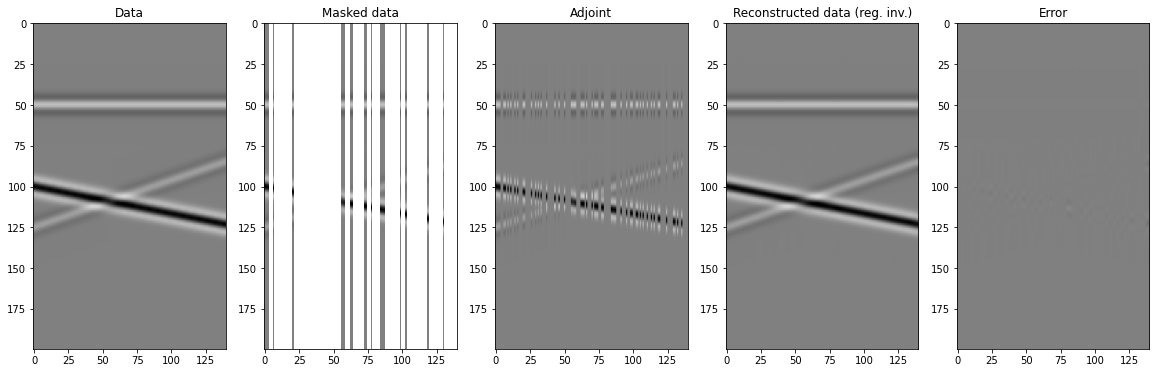

In [12]:
%%time
# Spatial smoothing with numpy
xinvf, _, _ = SeismicInterpolation(y, par['nx'], iava, kind='spatial', dottest=True,
                                   **dict(epsRs=[np.sqrt(0.1)], returninfo=False,
                                          damp=np.sqrt(1e-4), iter_lim=200 ,show=0))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Masked data')
axs[1].axis('tight')
axs[2].imshow(xadj.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Adjoint')
axs[2].axis('tight');
axs[3].imshow(xinvf.T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (reg. inv.)')
axs[3].axis('tight')
axs[4].imshow(x.T-xinvf.T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

Dot test passed, v^T(Opu)=103.165110 - u^T(Op^Tv)=103.165110
CGLS
-----------------------------------------------------------
The Operator Op has 39200 rows and 28000 cols
damp = 1.000000e-02	tol = 1.000000e-04	niter = 200
-----------------------------------------------------------------
    Itn           x[0]              r2norm
     1         0.0000e+00         1.6323e+02
     2         0.0000e+00         5.0288e+01
     3         0.0000e+00         2.9958e+01
     4         0.0000e+00         9.2410e+00
     5         0.0000e+00         7.1909e+00
     6         0.0000e+00         5.6026e+00
     7         0.0000e+00         2.1131e+00
     8         0.0000e+00         1.2311e+00
     9         0.0000e+00         9.8388e-01
    10         0.0000e+00         1.2048e+00
    20         0.0000e+00         2.8374e-01
    30         0.0000e+00         2.5935e-01
    40         0.0000e+00         2.6002e-01
    50         0.0000e+00         2.6273e-01

Iterations = 53        Total time (s)

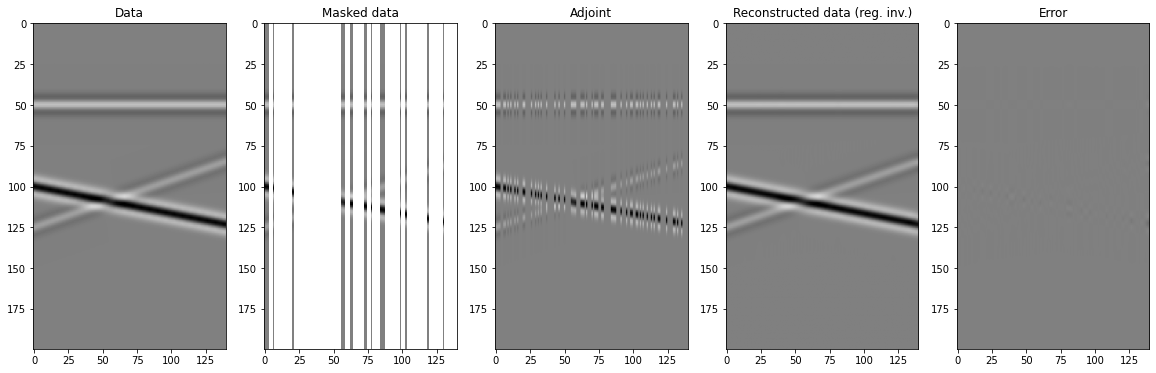

In [13]:
%%time
# Spatial smoothing with cupy
xinvf, _, _ = SeismicInterpolation(cp.array(y), par['nx'], iava, kind='spatial', dottest=True,
                                   **dict(epsRs=[np.sqrt(0.1)], returninfo=False,
                                          damp=np.sqrt(1e-4), niter=200 ,show=True))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Masked data')
axs[1].axis('tight')
axs[2].imshow(xadj.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Adjoint')
axs[2].axis('tight');
axs[3].imshow(cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (reg. inv.)')
axs[3].axis('tight')
axs[4].imshow(x.T-cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

In [14]:
# FK
nfft=2**10
FFTop = FFT2D(dims=[par['nx'], par['nt']], nffts=[nfft, nfft], sampling=[par['dx'], par['dt']])
p = FFTop*x.flatten()
p = np.reshape(p, (nfft, nfft))

In [15]:
%%time
# Inverse with numpy
xinvf, pinvf, cost = SeismicInterpolation(y, par['nx'], iava, kind='fk', nffts=(nfft, nfft), 
                                          sampling=(par['dx'], par['dt']), dottest=False,
                                          **dict(niter=50, eps=1e-2, returninfo=True, show=True))

FISTA optimization (soft thresholding)
-----------------------------------------------------------
The Operator Op has 11200 rows and 1048576 cols
eps = 1.000000e-02	tol = 1.000000e-10	niter = 50
alpha = 1.000000e+00	thresh = 5.000000e-03
-----------------------------------------------------------

   Itn       x[0]        r2norm     r12norm     xupdate
     1   0.00000e+00   3.120e+00   1.178e+02   3.038e+01
     2  -0.00000e+00   2.965e+00   1.130e+02   1.562e+00
     3  -0.00000e+00   2.794e+00   1.077e+02   1.857e+00
     4  -0.00000e+00   2.614e+00   1.022e+02   2.087e+00
     5  -0.00000e+00   2.436e+00   9.672e+01   2.265e+00
     6  -0.00000e+00   2.262e+00   9.133e+01   2.402e+00
     7  -0.00000e+00   2.102e+00   8.614e+01   2.508e+00
     8  -0.00000e+00   1.953e+00   8.117e+01   2.587e+00
     9  -0.00000e+00   1.819e+00   7.648e+01   2.644e+00
    10  -0.00000e+00   1.695e+00   7.207e+01   2.679e+00
    11  -0.00000e+00   1.584e+00   6.798e+01   2.693e+00
    21  -0.00000e

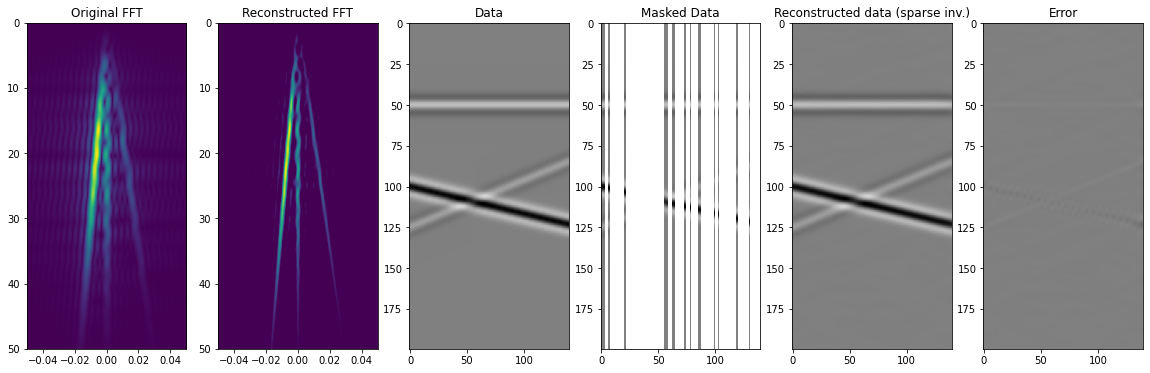

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(20, 6))
axs[0].imshow(np.fft.fftshift(np.abs(p[:, :nfft//2-1]),axes=0).T, 
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[0].set_title('Original FFT')
axs[0].axis('tight')
axs[0].set_ylim(50, 0)
axs[0].set_xlim(-0.05, 0.05)
axs[1].imshow(np.fft.fftshift(np.abs(pinvf[:, :nfft//2-1]),axes=0).T,
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[1].set_title('Reconstructed FFT')
axs[1].axis('tight')
axs[1].set_ylim(50, 0)
axs[1].set_xlim(-0.05, 0.05)
axs[2].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Data')
axs[2].axis('tight');
axs[3].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Masked Data')
axs[3].axis('tight');
axs[4].imshow(xinvf.T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Reconstructed data (sparse inv.)')
axs[4].axis('tight');
axs[5].imshow(x.T-xinvf.T, cmap='gray', vmin=-2, vmax=2)
axs[5].set_title('Error')
axs[5].axis('tight');

In [17]:
%%time
# Inverse with cupy
xinvf, pinvf, cost = SeismicInterpolation(cp.asarray(y), par['nx'], iava, kind='fk', nffts=(nfft, nfft), 
                                          sampling=(par['dx'], par['dt']), dottest=False,
                                          **dict(niter=50, eigsiter=10, eps=1e-2, show=True))

FISTA optimization (soft thresholding)
-----------------------------------------------------------
The Operator Op has 11200 rows and 1048576 cols
eps = 1.000000e-02	tol = 1.000000e-10	niter = 50
alpha = 1.000000e+00	thresh = 5.000000e-03
-----------------------------------------------------------

   Itn       x[0]        r2norm     r12norm     xupdate
     1  -0.00000e+00   3.120e+00   1.178e+02   3.038e+01
     2  -0.00000e+00   2.965e+00   1.130e+02   1.562e+00
     3  -0.00000e+00   2.794e+00   1.077e+02   1.857e+00
     4  -0.00000e+00   2.614e+00   1.022e+02   2.087e+00
     5  -0.00000e+00   2.436e+00   9.672e+01   2.265e+00
     6  -0.00000e+00   2.262e+00   9.133e+01   2.402e+00
     7  -0.00000e+00   2.102e+00   8.614e+01   2.508e+00
     8  -0.00000e+00   1.953e+00   8.117e+01   2.587e+00
     9  -0.00000e+00   1.819e+00   7.648e+01   2.644e+00
    10  -0.00000e+00   1.695e+00   7.207e+01   2.679e+00
    11  -0.00000e+00   1.584e+00   6.798e+01   2.693e+00
    21  -0.00000e

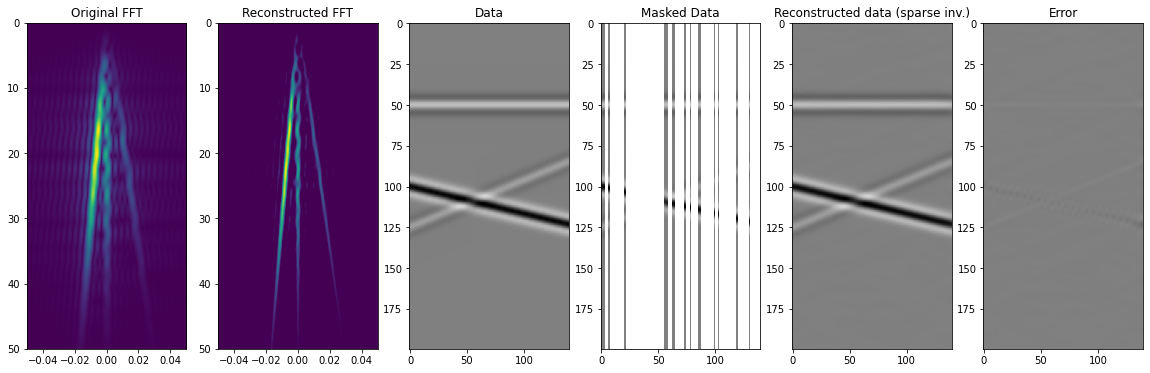

In [18]:
fig, axs = plt.subplots(1, 6, figsize=(20, 6))
axs[0].imshow(np.fft.fftshift(np.abs(p[:, :nfft//2-1]),axes=0).T, 
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[0].set_title('Original FFT')
axs[0].axis('tight')
axs[0].set_ylim(50, 0)
axs[0].set_xlim(-0.05, 0.05)
axs[1].imshow(np.fft.fftshift(np.abs(cp.asnumpy(pinvf)[:, :nfft//2-1]),axes=0).T,
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[1].set_title('Reconstructed FFT')
axs[1].axis('tight')
axs[1].set_ylim(50, 0)
axs[1].set_xlim(-0.05, 0.05)
axs[2].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Data')
axs[2].axis('tight');
axs[3].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Masked Data')
axs[3].axis('tight');
axs[4].imshow(cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Reconstructed data (sparse inv.)')
axs[4].axis('tight');
axs[5].imshow(x.T-cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[5].set_title('Error')
axs[5].axis('tight');

Dot test passed, v^T(Opu)=-3624.319172 - u^T(Op^Tv)=-3624.319172


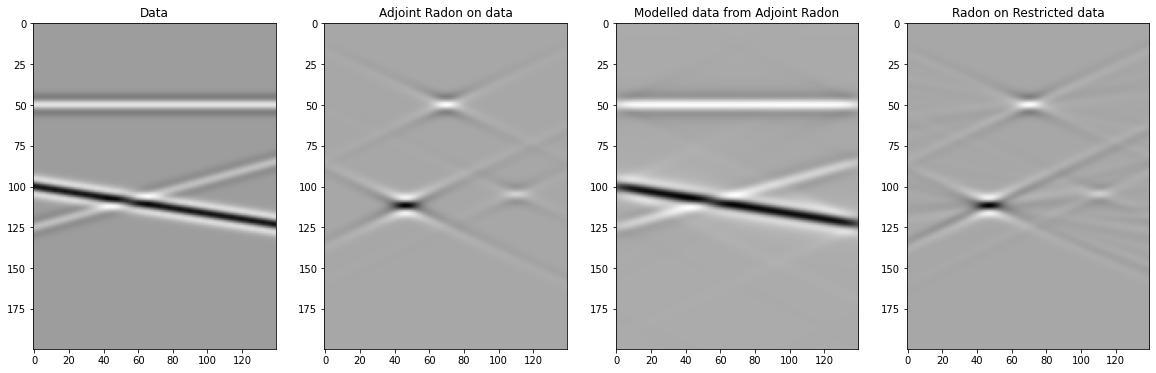

In [19]:
npx = par['nx']
pxmax = 1e-3
px = np.linspace(-pxmax, pxmax, npx)
Radop = ChirpRadon2D(taxis, xaxis, pxmax * par['dx'] / par['dt'])
dottest(Radop, par['nx']*par['nt'], npx*par['nt'], verb=True)

Rop1 = Rop*Radop

# Radon on original data
xradadj = Radop.H*x.flatten()
xradadj = xradadj.reshape(npx, par['nt'])

yradadj = Radop*xradadj.flatten()
yradadj = yradadj.reshape(par['nx'], par['nt'])

# Adjoint
xadj = Rop1.H*y.flatten()
xadj = xadj.reshape(npx, par['nt'])

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(x.T, cmap='gray')
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(xradadj.T, cmap='gray')
axs[1].set_title('Adjoint Radon on data')
axs[1].axis('tight')
axs[2].imshow(yradadj.T, cmap='gray')
axs[2].set_title('Modelled data from Adjoint Radon')
axs[2].axis('tight');
axs[3].imshow(xadj.T, cmap='gray')
axs[3].set_title('Radon on Restricted data')
axs[3].axis('tight');

FISTA optimization (soft thresholding)
-----------------------------------------------------------
The Operator Op has 11200 rows and 28000 cols
eps = 5.000000e-01	tol = 1.000000e-10	niter = 20
alpha = 1.313247e-04	thresh = 3.283116e-05
-----------------------------------------------------------

   Itn       x[0]        r2norm     r12norm     xupdate
     1  -0.00000e+00   4.297e+02   4.327e+02   1.133e-01
     2   0.00000e+00   3.560e+02   3.617e+02   1.003e-01
     3   0.00000e+00   2.818e+02   2.903e+02   1.146e-01
     4   0.00000e+00   2.138e+02   2.253e+02   1.222e-01
     5   0.00000e+00   1.559e+02   1.703e+02   1.241e-01
     6   0.00000e+00   1.094e+02   1.265e+02   1.215e-01
     7   0.00000e+00   7.412e+01   9.362e+01   1.154e-01
     8   0.00000e+00   4.858e+01   7.014e+01   1.070e-01
     9   0.00000e+00   3.094e+01   5.419e+01   9.699e-02
    10   0.00000e+00   1.931e+01   4.389e+01   8.629e-02
    11   0.00000e+00   1.198e+01   3.752e+01   7.552e-02
    12  -0.00000e+0

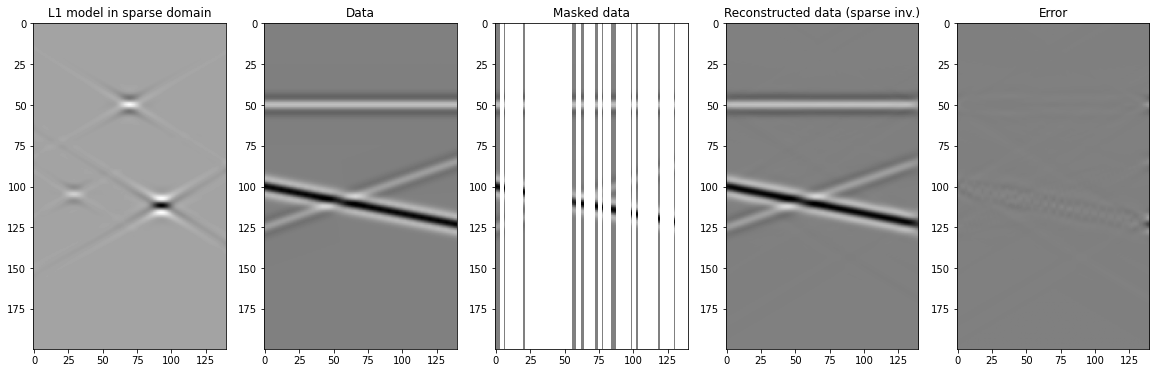

In [20]:
%%time
px = np.linspace(-pxmax, pxmax, npx)
xinvf, pinvf, cost = SeismicInterpolation(y, par['nx'], iava, kind='radon-linear', spataxis=xaxis, 
                                          taxis=taxis, paxis=px, centeredh=True, dottest=False,
                                          **dict(niter=20, eps=5e-1, show=True))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(cp.asnumpy(pinvf).T, cmap='gray')
axs[0].set_title('L1 model in sparse domain')
axs[0].axis('tight')
axs[1].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Data')
axs[1].axis('tight');
axs[2].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Masked data')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (sparse inv.)')
axs[3].axis('tight');
axs[4].imshow(x.T-cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

FISTA optimization (soft thresholding)
-----------------------------------------------------------
The Operator Op has 11200 rows and 28000 cols
eps = 5.000000e-01	tol = 1.000000e-10	niter = 20
alpha = 1.275510e-04	thresh = 3.188776e-05
-----------------------------------------------------------

   Itn       x[0]        r2norm     r12norm     xupdate
     1  -0.00000e+00   4.279e+02   4.310e+02   1.127e-01
     2   0.00000e+00   3.529e+02   3.585e+02   9.977e-02
     3   0.00000e+00   2.775e+02   2.860e+02   1.139e-01
     4   0.00000e+00   2.086e+02   2.200e+02   1.213e-01
     5   0.00000e+00   1.503e+02   1.646e+02   1.229e-01
     6   0.00000e+00   1.039e+02   1.208e+02   1.199e-01
     7   0.00000e+00   6.902e+01   8.831e+01   1.135e-01
     8   0.00000e+00   4.418e+01   6.548e+01   1.046e-01
     9   0.00000e+00   2.738e+01   5.032e+01   9.416e-02
    10  -0.00000e+00   1.659e+01   4.079e+01   8.306e-02
    11  -0.00000e+00   1.002e+01   3.513e+01   7.197e-02
    12  -0.00000e+0

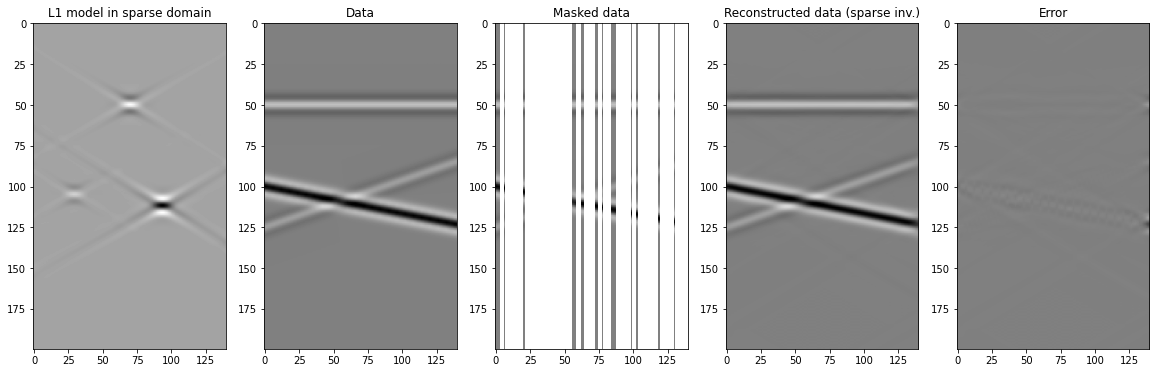

In [21]:
%%time
px = np.linspace(-pxmax, pxmax, npx)
xinvf, pinvf, cost = SeismicInterpolation(cp.asarray(y), par['nx'], iava, kind='chirpradon-linear', spataxis=xaxis, 
                                          taxis=taxis, paxis=px, centeredh=True, dottest=False,
                                          **dict(niter=20, eps=5e-1, show=True))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(cp.asnumpy(pinvf).T, cmap='gray')
axs[0].set_title('L1 model in sparse domain')
axs[0].axis('tight')
axs[1].imshow(x.T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Data')
axs[1].axis('tight');
axs[2].imshow(ymask.T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Masked data')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (sparse inv.)')
axs[3].axis('tight');
axs[4].imshow(x.T-cp.asnumpy(xinvf).T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

## 2D realistic

In [22]:
from google.colab import drive

drive.mount('/content/gdrive')
inputfile = '/content/gdrive/My Drive/marchenko2d_input.npz'

Mounted at /content/gdrive


sampling 150.0
Dot test passed, v^T(Opu)=-46.153440 - u^T(Op^Tv)=-46.153440


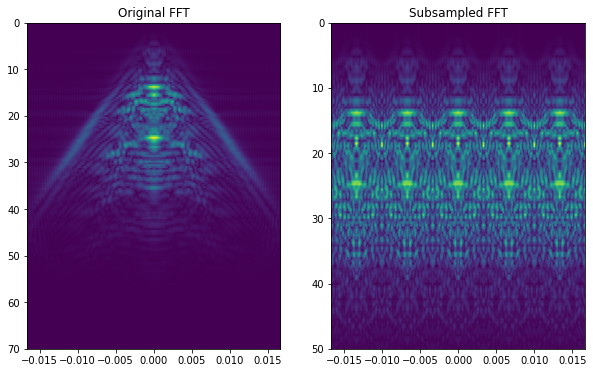

In [24]:
inputdata = np.load(inputfile)

x = inputdata['R'][50, :, :-100]
x = x/np.abs(x).max()

taxis, xaxis = inputdata['t'][:-100], inputdata['r'][0]
par = {}
par['nx'], par['nt'] = x.shape
par['dx'] = inputdata['r'][0, 1] - inputdata['r'][0, 0]
par['dt'] = inputdata['t'][1] - inputdata['t'][0]

# add wavelet
wav = 0.3*inputdata['wav']
wav_c = np.argmax(wav)
x = np.apply_along_axis(convolve, 1, x, wav, mode='full')
x = x[:, wav_c:][:, :par['nt']]

# gain
gain = np.tile((taxis**2)[:, np.newaxis], (1, par['nx'])).T
x = x*gain

# subsampling locations (random)
#perc_subsampling=0.6
#Nsub=int(np.round(par['nx']*perc_subsampling))
#iava = np.sort(np.random.permutation(np.arange(par['nx']))[:Nsub])

# subsampling locations (regular)
iava = np.arange(0, par['nx'], 5)
print('sampling', par['dx']*5)
Nsub = len(iava)

# Create restriction operator
Rop = Restriction(par['nx']*par['nt'], iava, dims=(par['nx'], par['nt']), dir=0, dtype='float64')
dottest(Rop,Nsub*par['nt'],par['nx']*par['nt'], verb=True)

y     = Rop*x.flatten()
xadj = Rop.H*y.flatten()
y = y.reshape(Nsub, par['nt'])
xadj = xadj.reshape( par['nx'], par['nt'])

# Apply mask
ymask = Rop.mask(x.flatten())

# FFT of full data
nfft=2**10
FFTop = FFT2D(dims=[par['nx'], par['nt']], nffts=[nfft, nfft], sampling=[par['dx'], par['dt']])
p = FFTop*x.flatten()
p = np.reshape(p, (nfft, nfft))

pmask = FFTop * ymask.flatten()
pmask = np.reshape(pmask, (nfft, nfft))

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(np.fft.fftshift(np.abs(p[:, :nfft//2-1]),axes=0).T, 
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[0].set_title('Original FFT')
axs[0].axis('tight')
axs[0].set_ylim(70, 0)
axs[1].imshow(np.fft.fftshift(np.abs(pmask[:, :nfft//2-1]),axes=0).T,
              extent=(np.fft.fftshift(FFTop.f1)[0], np.fft.fftshift(FFTop.f1)[-1], 
                      FFTop.f2[nfft//2-1], FFTop.f2[0]))
axs[1].set_title('Subsampled FFT')
axs[1].axis('tight')
axs[1].set_ylim(50, 0);

Dot test passed, v^T(Opu)=-31.758550 - u^T(Op^Tv)=-31.758550
CGLS
-----------------------------------------------------------
The Operator Op has 85400 rows and 70700 cols
damp = 1.000000e-02	tol = 1.000000e-04	niter = 200
-----------------------------------------------------------------
    Itn           x[0]              r2norm
     1         0.0000e+00         8.9813e-02
     2         0.0000e+00         2.6661e-02
     3         0.0000e+00         1.1509e-02
     4         0.0000e+00         1.1713e-02
     5         0.0000e+00         2.8764e-03
     6         0.0000e+00         3.7941e-03
     7         0.0000e+00         4.1776e-03
     8         0.0000e+00         1.5513e-03
     9         0.0000e+00         4.9727e-04
    10         0.0000e+00         3.3407e-04

Iterations = 10        Total time (s) = 0.02
-----------------------------------------------------------------



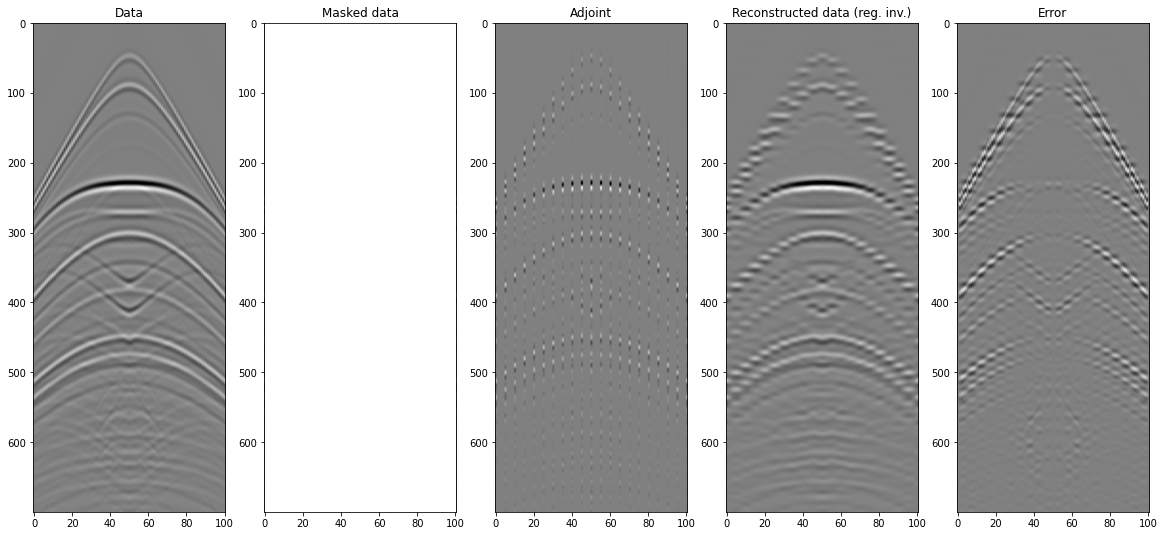

In [25]:
xinv, _, _ = SeismicInterpolation(cp.asarray(y), par['nx'], iava, kind='spatial', dottest=True,
                                  **dict(epsRs=[np.sqrt(0.1)], returninfo=False,
                                      damp=np.sqrt(1e-4), niter=200, show=True))

fig, axs = plt.subplots(1, 5, figsize=(20, 9))
axs[0].imshow(x.T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(ymask.T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[1].set_title('Masked data')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(xadj).T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[2].set_title('Adjoint')
axs[2].axis('tight');
axs[3].imshow(cp.asnumpy(xinv).T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[3].set_title('Reconstructed data (reg. inv.)')
axs[3].axis('tight')
axs[4].imshow(x.T-cp.asnumpy(xinv).T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[4].set_title('Error')
axs[4].axis('tight');

Dot test passed, v^T(Opu)=542.846082 - u^T(Op^Tv)=542.846082
FISTA optimization (soft thresholding)
-----------------------------------------------------------
The Operator Op has 14700 rows and 126000 cols
eps = 5.000000e-03	tol = 1.000000e-10	niter = 400
alpha = 1.200000e-03	thresh = 3.000000e-06
-----------------------------------------------------------

   Itn       x[0]        r2norm     r12norm     xupdate
     1   0.00000e+00   3.174e-01   3.202e-01   3.229e-03
     2   0.00000e+00   3.078e-01   3.133e-01   3.162e-03
     3   0.00000e+00   2.960e-01   3.048e-01   3.969e-03
     4   0.00000e+00   2.824e-01   2.952e-01   4.702e-03
     5   0.00000e+00   2.673e-01   2.847e-01   5.365e-03
     6   0.00000e+00   2.512e-01   2.735e-01   5.956e-03
     7   0.00000e+00   2.343e-01   2.621e-01   6.474e-03
     8   0.00000e+00   2.171e-01   2.507e-01   6.919e-03
     9   0.00000e+00   1.997e-01   2.395e-01   7.291e-03
    10   0.00000e+00   1.827e-01   2.287e-01   7.588e-03
    11   0.00

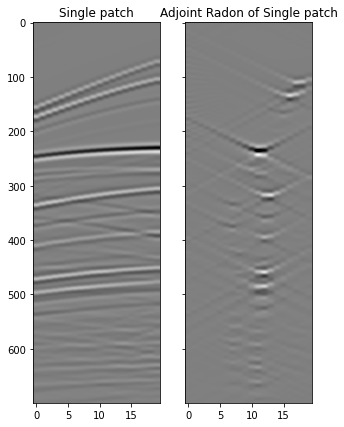

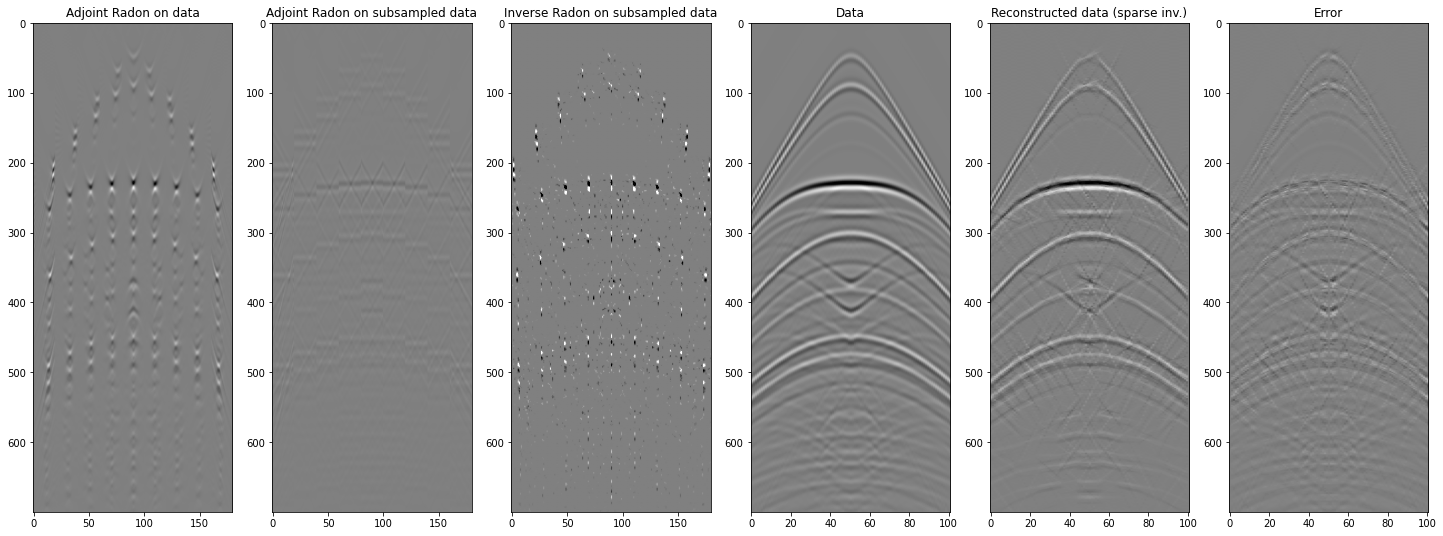

In [26]:
dx = par['dx']
nwin=20
nwins=9
nover=10
npx=nwin
pxmax = 5e-4
px = np.linspace(-pxmax, pxmax, npx)
dimsd = x.shape
dims = (nwins*npx, dimsd[1])

# sliding window radon with overlap
Op = ChirpRadon2D(taxis, np.linspace(-dx*nwin//2, dx*nwin//2, nwin), pxmax * par['dx'] / par['dt'])
Slidop = Sliding2D(Op, dims, dimsd, nwin, nover, tapertype='cosine', design=False)
dottest(Slidop, np.prod(dimsd), np.prod(dims))

# radon on one patch
x1 = x[1*nwin:2*nwin]
y1 = Op.H*x1.flatten()
y1 = y1.reshape(npx, par['nt'])

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(5, 7))
axs[0].imshow(x1.T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[0].axis('tight')
axs[0].set_title('Single patch')

axs[1].imshow(y1.T, cmap='gray', vmin=-0.5, vmax=0.5)
axs[1].axis('tight')
axs[1].set_title('Adjoint Radon of Single patch');

# adjoint
Rop1 = Rop*Slidop

padj_fromx = Slidop.H*x.flatten()
padj_fromx = padj_fromx.reshape(npx*nwins, par['nt'])

padj = Rop1.H*y.flatten()
padj = padj.reshape(npx*nwins, par['nt'])

# inverse
xinv, pinv, _ = SeismicInterpolation(cp.asarray(y), par['nx'], iava, kind='sliding', spataxis=xaxis, 
                                     taxis=taxis, paxis=px, nwins=nwins, nwin=nwin, 
                                     nover=nover, dottest=True,
                                     **dict(niter=400, eps=5e-3, alpha=1.2e-3, 
                                            returninfo=True, show=True))

fig, axs = plt.subplots(1, 6, figsize=(25, 9))
axs[0].imshow(padj_fromx.T, cmap='gray', vmin=-0.5, vmax=0.5)
axs[0].set_title('Adjoint Radon on data')
axs[0].axis('tight')
axs[1].imshow(padj.T, cmap='gray', vmin=-0.5, vmax=0.5)
axs[1].set_title('Adjoint Radon on subsampled data')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(pinv).T, cmap='gray', vmin=-0.01, vmax=0.01)
axs[2].set_title('Inverse Radon on subsampled data')
axs[2].axis('tight')
axs[3].imshow(x.T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[3].set_title('Data')
axs[3].axis('tight');
axs[4].imshow(cp.asnumpy(xinv).T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[4].set_title('Reconstructed data (sparse inv.)')
axs[4].axis('tight')
axs[5].imshow(x.T-cp.asnumpy(xinv).T, cmap='gray', vmin=-0.05, vmax=0.05)
axs[5].set_title('Error')
axs[5].axis('tight');

## 3D

In [ ]:
###### Input parameters
par = {'oy':0,'dy':2,    'ny':51,
       'ox':0,'dx':2,    'nx':30,
       'ot':0,'dt':0.004,'nt':100,
       'f0': 20, 'nfmax': 210}

v       = 1500
t0_m    = [0.1, 0.2, 0.3]
theta_m = [0, 30, -60]
phi_m   = [0, 50, 30]
amp_m   = [1., -2, 0.5]

# Create axis
taxis, taxis2, xaxis, yaxis = makeaxis(par)
dt, dx, dy = par['dt'], par['dx'], par['dy']

# Create wavelet
wav = ricker(taxis[:41], f0=par['f0'])[0]

# Generate model
m, x =  linear3d(xaxis, yaxis, taxis, v, t0_m, theta_m, phi_m, amp_m, wav)

# subsampling locations
perc_subsampling=0.4
Nsub=int(np.round(par['ny']*perc_subsampling))

iava = np.sort(np.random.permutation(np.arange(par['ny']))[:Nsub])

# Create restriction operator
Rop = Restriction(par['ny']*par['nx']*par['nt'], iava, 
                  dims=(par['ny'], par['nx'], par['nt']), dir=0, dtype='float64')
dottest(Rop,Nsub*par['nx']*par['nt'], par['ny']*par['nx']*par['nt'], verb=True)

y = Rop*x.flatten()
xadj = Rop.H*y.flatten()
y = y.reshape(Nsub, par['nx'], par['nt'])
xadj = xadj.reshape( par['ny'], par['nx'], par['nt'])

# Apply mask
ymask = Rop.mask(x.flatten())

In [ ]:
# Invert for interpolated signal
xinv, _, _ = SeismicInterpolation(cp.asarray(y), (par['ny'], par['nx']), iava, kind='spatial', dottest=True,
                                  **dict(epsRs=[np.sqrt(0.1)], returninfo=False,
                                         damp=np.sqrt(1e-4), niter=100, show=0))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(x[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(ymask[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Masked data')
axs[1].axis('tight')
axs[2].imshow(xadj[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Adjoint')
axs[2].axis('tight');
axs[3].imshow(cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (reg. inv.)')
axs[3].axis('tight')
axs[4].imshow(x[:, par['nx']//2].T-cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(x[par['ny']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(ymask[par['ny']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Masked data')
axs[1].axis('tight')
axs[2].imshow(xadj[par['ny']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Adjoint')
axs[2].axis('tight');
axs[3].imshow(cp.asnumpy(xinv)[par['ny']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (reg. inv.)')
axs[3].axis('tight')
axs[4].imshow(x[par['ny']//2].T-cp.asnumpy(xinv)[par['ny']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

In [ ]:
nfft=2**7
FFTop = FFTND(dims=[par['ny'], par['nx'], par['nt']], nffts=[nfft, nfft, nfft], 
              sampling=[par['dy'], par['dx'], par['dt']])
dottest(FFTop, nfft*nfft*nfft, par['ny']*par['nx']*par['nt'], complexflag=2, verb=True)
p = FFTop*x.flatten()
p = np.reshape(p, (nfft, nfft, nfft))

# Inverse
xinv, pinv, _ = SeismicInterpolation(cp.asarray(y), (par['ny'], par['nx']), iava, kind='fk', nffts=(nfft, nfft, nfft), 
                                     sampling=(par['dy'], par['dx'], par['dt']), dottest=False,
                                     **dict(niter=50, eps=1e-1, alpha=1e0, returninfo=True, show=True))

fig, axs = plt.subplots(1, 6, figsize=(20, 9))
axs[0].imshow(np.fft.fftshift(np.abs(p[:, 1, :nfft//2-1]),axes=0).T, 
              extent=(np.fft.fftshift(FFTop.fs[0])[0], np.fft.fftshift(FFTop.fs[0])[-1], 
                      FFTop.fs[2][nfft//2-1], FFTop.fs[2][0]), vmin=0, vmax=10)
axs[0].set_title('Original FFT')
axs[0].axis('tight')
axs[0].set_ylim(50, 0)
axs[0].set_xlim(-0.05, 0.05)
axs[1].imshow(np.fft.fftshift(np.abs(cp.asnumpy(pinv)[:, 1, :nfft//2-1]), axes=0).T,
              extent=(np.fft.fftshift(FFTop.fs[0])[0], np.fft.fftshift(FFTop.fs[0])[-1], 
                      FFTop.fs[2][nfft//2-1], FFTop.fs[2][0]), vmin=0, vmax=10)
axs[1].set_title('Reconstructed FFT')
axs[1].axis('tight')
axs[1].set_ylim(50, 0)
axs[1].set_xlim(-0.05, 0.05)
axs[2].imshow(x[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Data')
axs[2].axis('tight');
axs[3].imshow(ymask[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Masked data')
axs[3].axis('tight')
axs[4].imshow(cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Reconstructed data (sparse inv.)')
axs[4].axis('tight');
axs[5].imshow(x[:, par['nx']//2].T-cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[5].set_title('Error')
axs[5].axis('tight');

In [ ]:
npy, pymax = par['ny'], 4e-3
npx, pxmax = par['nx'], 4e-3

py = np.linspace(-pymax, pymax, npy)
px = np.linspace(-pxmax, pxmax, npx)

Radop = ChirpRadon3D(taxis, yaxis, xaxis, (pymax*dy/dt, pxmax*dx/dt), dtype='float64')
dottest(Radop, par['ny']*par['nx']*par['nt'], npy*npx*par['nt'], verb=True)

Rop1 = Rop*Radop.H

# Radon on original data
xradadj = Radop * x.flatten()

yradadj = Radop.H * xradadj.flatten()

# Adjoint
#xadj = Rop1*y.flatten()

xradadj = xradadj.reshape(par['ny'], par['nx'], par['nt'])
yradadj = yradadj.reshape(par['ny'], par['nx'], par['nt'])
xadj = xadj.reshape(par['ny'], par['nx'], par['nt'])

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(x[:, par['nx']//2].T, cmap='gray')
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(xradadj[:, npx//2].T, cmap='gray')
axs[1].set_title('Adjoint Radon on data')
axs[1].axis('tight')
axs[2].imshow(yradadj[:, par['nx']//2].T, cmap='gray')
axs[2].set_title('Modelled data from Adjoint Radon')
axs[2].axis('tight')
axs[3].imshow(xadj[:, par['nx']//2].T, cmap='gray')
axs[3].set_title('Radon on Restricted data')
axs[3].axis('tight');

In [ ]:
npx=par['nx']
npy=par['ny']
pxmax = 4e-3
px = np.linspace(-pxmax, pxmax, npx)
py = np.linspace(-pxmax, pxmax, npy)
Radop = Radop = Radon3D(taxis, yaxis, xaxis, py, px, engine='numba', interp=False)
dottest(Radop, par['ny']*par['nx']*par['nt'], npy*npx*par['nt'], verb=True)

Rop1 = Rop*Radop

# Radon on original data
xradadj = Radop.H * x.flatten()
xradadj = xradadj.reshape(npy, npx, par['nt'])

yradadj = Radop * xradadj.flatten()
yradadj = yradadj.reshape(par['ny'], par['nx'], par['nt'])

# Adjoint
xadj = Rop1.H*y.flatten()
xadj = xadj.reshape(npy, npx, par['nt'])

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(x[:, par['nx']//2].T, cmap='gray')
axs[0].set_title('Data')
axs[0].axis('tight')
axs[1].imshow(xradadj[:, npx//2].T, cmap='gray')
axs[1].set_title('Adjoint Radon on data')
axs[1].axis('tight')
axs[2].imshow(yradadj[:, par['nx']//2].T, cmap='gray')
axs[2].set_title('Modelled data from Adjoint Radon')
axs[2].axis('tight')
axs[3].imshow(xadj[:, par['nx']//2].T, cmap='gray')
axs[3].set_title('Radon on Restricted data')
axs[3].axis('tight');

In [ ]:
xinv, pinv, _ = SeismicInterpolation(cp.asarray(y), (par['ny'], par['nx']), 
                                     iava, kind='chirpradon-linear', spataxis=yaxis, spat1axis=xaxis, engine='numba',
                                     taxis=taxis, paxis=px, p1axis=px, centeredh=True, dottest=False,
                                     **dict(niter=400, eps=5e0, eigsiter=5, returninfo=True, show=True))

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
axs[0].imshow(cp.asnumpy(pinv)[:, npx//2].T, cmap='gray', vmin=-0.001, vmax=0.001)
axs[0].set_title('L1 model in sparse domain')
axs[0].axis('tight')
axs[1].imshow(x[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1].set_title('Data')
axs[1].axis('tight');
axs[2].imshow(ymask[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[2].set_title('Masked data')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[3].set_title('Reconstructed data (sparse inv.)')
axs[3].axis('tight');
axs[4].imshow(x[:, par['nx']//2].T-cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[4].set_title('Error')
axs[4].axis('tight');

In [ ]:
dy = par['dy']
dx = par['dx']
nwin=(24, 11)
nwins=(2, 3)
nover=(6, 4)
npy=nwin[0]
npx=nwin[1]
pxmax = 5e-3
px = np.linspace(-pxmax, pxmax, npx)
py = np.linspace(-pxmax, pxmax, npy)
dimsd = (par['ny'], par['nx'], par['nt'])
dims = (nwins[0]*npy, nwins[1]*npx, dimsd[2])

# sliding window radon with overlap
Op = Radon3D(taxis, np.linspace(-dy*nwin[0]//2, dy*nwin[0]//2, nwin[0]), 
             np.linspace(-dx*nwin[1]//2, dx*nwin[1]//2, nwin[1]), 
             py, px, centeredh=True,
             kind='linear', engine='numba')
Slidop = Sliding3D(Op, dims, dimsd, nwin, nover, (npy, npx), tapertype='cosine', design=True)
dottest(Slidop, np.prod(dimsd), np.prod(dims), verb=True)

# adjoint
Rop1 = Rop*Slidop

padj_fromx = Slidop.H*x.flatten()
padj_fromx = padj_fromx.reshape(nwins[0], nwins[1], npy, npx, par['nt'])

padj = Rop1.H*y.flatten()
padj = padj.reshape(nwins[0], nwins[1], npy, npx, par['nt'])

xinvf, pinvf, _ = SeismicInterpolation(cp.asarray(y), (par['ny'], par['nx']), iava, kind='sliding', 
                                       spataxis=yaxis, spat1axis=xaxis, 
                                       taxis=taxis, paxis=py, p1axis=px, nwins=nwins, nwin=nwin, 
                                       nover=nover, dottest=False, engine='numpy',
                                       **dict(niter=300, eps=5e0, eigsiter=5, returninfo=True, show=True))

fig, axs = plt.subplots(2, 4, figsize=(25, 12))
axs[0][0].imshow(padj_fromx[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-100, vmax=100)
axs[0][0].set_title('Adjoint Radon on data')
axs[0][0].axis('tight')
axs[0][1].imshow(padj[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-100, vmax=100)
axs[0][1].set_title('Adjoint Radon on subsampled data')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(pinvf)[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-0.1, vmax=0.1)
axs[0][2].set_title('Inverse Radon on subsampled data')
axs[0][2].axis('tight')
axs[1][0].imshow(x[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1][0].set_title('Data')
axs[1][0].axis('tight');
axs[1][1].imshow(ymask[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1][1].set_title('Masked data')
axs[1][1].axis('tight');
axs[1][2].imshow(cp.asnumpy(xinvf)[:, par['nx']//2].T, cmap='gray', vmin=-2, vmax=2)
axs[1][2].set_title('Reconstructed data (sparse inv.)')
axs[1][2].axis('tight')
axs[1][3].imshow(x[:, par['nx']//2].T-cp.asnumpy(xinvf)[:, par['nx']//2].T, 
                 cmap='gray', vmin=-2, vmax=2)
axs[1][3].set_title('Error')
axs[1][3].axis('tight');

## 3D Realistic

In [ ]:
inputfile3d = '/content/gdrive/My Drive/input3d_interp.npz'
inputdata3d = np.load(inputfile3d)

x = np.transpose(inputdata3d['data'], (2, 1, 0))[:,:, :400:2]
x = x/np.abs(x).max()

taxis, xaxis, yaxis = inputdata3d['t'][:400:2], inputdata3d['rx'][:], inputdata3d['ry'][:]
par = {}
par['ny'], par['nx'], par['nt'] = x.shape
par['dx'] = inputdata3d['rx'][1] - inputdata3d['rx'][0]
par['dy'] = inputdata3d['ry'][1] - inputdata3d['ry'][0]
par['dt'] = inputdata3d['t'][1] - inputdata3d['t'][0]

# add wavelet
wav3d = wav[::3]
wav3d_c = np.argmax(wav3d)
x = np.apply_along_axis(convolve, 2, x, wav3d, mode='full')
x = x[:, :, wav3d_c:][:, :, :par['nt']]

# gain
gain = np.transpose(np.tile((taxis**2)[:, np.newaxis, np.newaxis], (1, par['ny'], par['nx'])), (1, 2, 0))
x = x*gain

# subsampling locations
perc_subsampling=0.6
Nsub=int(np.round(par['ny']*perc_subsampling))
iava = np.sort(np.random.permutation(np.arange(par['ny']))[:Nsub])
#iava = np.arange(0, par['ny'], 5)
#Nsub = len(iava)

# Create restriction operator
Rop = Restriction(par['ny']*par['nx']*par['nt'], iava, 
                  dims=(par['ny'], par['nx'], par['nt']), dir=0, dtype='float64')
dottest(Rop,Nsub*par['nx']*par['nt'], par['ny']*par['nx']*par['nt'], verb=True)

y = Rop*x.flatten()
xadj = Rop.H*y.flatten()
y = y.reshape(Nsub, par['nx'], par['nt'])
xadj = xadj.reshape( par['ny'], par['nx'], par['nt'])

# Apply mask
ymask = Rop.mask(x.flatten())

In [ ]:
dy = par['dy']
dx = par['dx']
nwin=(21, 19)
nwins=(9, 6)
nover=(9, 7)
npy=nwin[0]
npx=nwin[1]
pxmax = 5e-4
py = px = np.linspace(-pxmax, pxmax, npx)
dimsd = (par['ny'], par['nx'], par['nt'])
dims = (nwins[0]*npy, nwins[1]*npx, dimsd[2])

# sliding window radon with overlap
Op = ChirpRadon3D(taxis, np.linspace(-dy*nwin[0]//2, dy*nwin[0]//2, nwin[0]), 
                  np.linspace(-dx*nwin[1]//2, dx*nwin[1]//2, nwin[1]), 
                  (pxmax * dy /par['dt'], pxmax * dx /par['dt']))
Slidop = Sliding3D(Op, dims, dimsd, nwin, nover, (npy, npx), tapertype='cosine', design=True)
dottest(Slidop, np.prod(dimsd), np.prod(dims), verb=True)

# adjoint
Rop1 = Rop*Slidop

padj_fromx = Slidop.H*x.flatten()
padj_fromx = padj_fromx.reshape(nwins[0], nwins[1], npy, npx, par['nt'])

padj = Rop1.H*y.flatten()
padj = padj.reshape(nwins[0], nwins[1], npy, npx, par['nt'])

In [ ]:
xinv, pinv, cost = SeismicInterpolation(cp.asarray(y), (par['ny'], par['nx']), iava, kind='sliding', 
                                        spataxis=yaxis, spat1axis=xaxis, 
                                        taxis=taxis, paxis=py, p1axis=px, nwins=nwins, nwin=nwin,
                                        nover=nover, dottest=False,
                                        **dict(niter=300, eigsiter=5,
                                               eps=5e-2, returninfo=True, show=True))

fig, axs = plt.subplots(2, 4, figsize=(25, 12))
axs[0][0].imshow(padj_fromx[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-1, vmax=1)
axs[0][0].set_title('Adjoint Radon on data')
axs[0][0].axis('tight')
axs[0][1].imshow(padj[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-1, vmax=1)
axs[0][1].set_title('Adjoint Radon on subsampled data')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(pinv)[nwins[0]//2, :, :, npx//2].reshape(nwins[1]*npy, par['nt']).T, 
                 cmap='gray', vmin=-0.001, vmax=0.001)
axs[0][2].set_title('Inverse Radon on subsampled data')
axs[0][2].axis('tight')
axs[1][0].imshow(x[:, par['nx']//2].T, cmap='gray', vmin=-0.005, vmax=0.005)
axs[1][0].set_title('Data')
axs[1][0].axis('tight');
axs[1][1].imshow(ymask[:, par['nx']//2].T, cmap='gray', vmin=-0.005, vmax=0.005)
axs[1][1].set_title('Masked data')
axs[1][1].axis('tight');
axs[1][2].imshow(cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-0.005, vmax=0.005)
axs[1][2].set_title('Reconstructed data (sparse inv.)')
axs[1][2].axis('tight')
axs[1][3].imshow(x[:, par['nx']//2].T-cp.asnumpy(xinv)[:, par['nx']//2].T, cmap='gray', vmin=-0.005, vmax=0.005)
axs[1][3].set_title('Error')
axs[1][3].axis('tight');